<a href="https://colab.research.google.com/github/njeri-max/Sentiment_Analysis_Binary/blob/main/IMDB_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMDB COMET ML PROJECT
1. This project focuses on deploying Comet ML experimentation tool.
2. The outcome ensures a fully created Machine learning project from beginning to the end.
3. Comet ML was best suited for this NLP-binary classification project as it can be integrated with popular machine learning libraries.

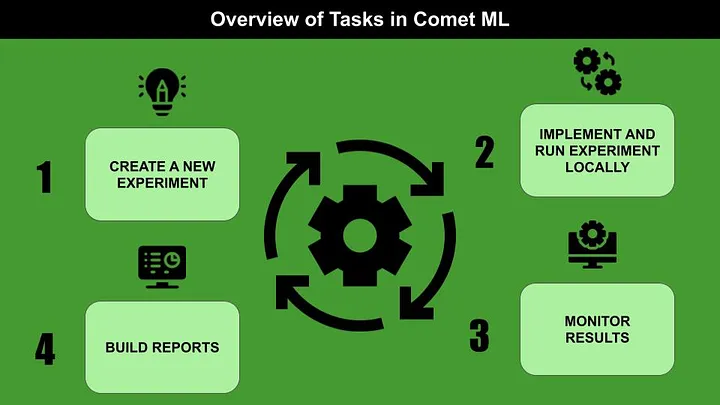

Image from: https://medium.com/towards-data-science/getting-started-with-comet-ml-549d44aff0c9

In [3]:
# install dependencies and Comet
!pip install comet_ml torch datasets transformers scikit-learn gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 713.5/713.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# initialize Comet
import comet_ml

comet_ml.login(project_name='IMDB_BERT')

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


In [5]:
# Set model type
Pre_Trained_Model = 'distilbert-base-uncased'
seed = 20 #ensures that the random processes produce the same results

In [6]:
#load the data
from transformers import AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset

raw_dataset = load_dataset('imdb')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [7]:
# Set up the tokenizer which is best suited to transform the raw-data into an understandable format
tokenizer = AutoTokenizer.from_pretrained(Pre_Trained_Model)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [8]:
def tokenize_function(examples):
  return tokenizer(examples["text"], padding="max_length", truncation=True)
tokenized_datasets = raw_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [9]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [10]:
# Create Sample datasets
train_dataset = tokenized_datasets['train'].shuffle(seed=seed).select(range(200))
eval_dataset = tokenized_datasets['test'].shuffle(seed=seed).select(range(200))

In [11]:
#Set up the transformer model
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(Pre_Trained_Model, num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
# Setup  Evaluation Functions
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

'''
This function retrieves the text content in the evaluation dataset
it is useful for analyzing specific data poiunts during model evaluation
'''
def get_example(index):
  return eval_dataset[index]['text']

'''
This function evaluates the performance of the ML model
As is specified, this is a binary problem
After calculating the needed metrics, it logs them to comet_ml for tracking
'''
def compute_metrics(pred):
  experiment = comet_ml.get_global_experiment()
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  acc = accuracy_score(labels, preds)
  experiment.log_metric('accuracy', acc)
  precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')

  if experiment:
    epoch = int(experiment.curr_epoch) if experiment.curr_epoch is not None else 0
    experiment.set_epoch(epoch)
    experiment.log_confusion_matrix(
        y_true = labels,
        y_predicted = preds,
        file_name = f'confusion_matrix_epoch {epoch}.json',
        labels = ['negative', 'positive'],
        index_to_example_function=get_example,
    )
    for i in range(20):
      experiment.log_text(get_example(i), metadata={'label':labels[i].item()})
  return {'accuracy':acc, 'f1':f1, 'precision':precision, 'recall':recall}

In [13]:
# Run Training

# enabling logging from Hugging face
# This means activating Comet ML to track and log
# the training process
%env COMET_MODE=ONLINE
%env COMET_LOG_ASSETS=TRUE


training_args = TrainingArguments(
    seed=seed,
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=1,
    do_train=True,
    do_eval=True,
    evaluation_strategy='steps',
    eval_steps=25,
    save_strategy='steps',
    save_total_limit=30,
    save_steps=25,
    per_device_train_batch_size=8,
    report_to='comet_ml'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=data_collator
)
trainer.train()

env: COMET_MODE=ONLINE
env: COMET_LOG_ASSETS=TRUE


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/njeri-max/imdb-bert/dea9fc89db6b46b086d2e331534ea5ec

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
25,No log,0.658789,0.740000,0.643836,0.959184,0.484536


TrainOutput(global_step=25, training_loss=0.6847407531738281, metrics={'train_runtime': 890.1873, 'train_samples_per_second': 0.225, 'train_steps_per_second': 0.028, 'total_flos': 26493479731200.0, 'train_loss': 0.6847407531738281, 'epoch': 1.0})

In [14]:
import gradio as gr
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load your trained model and tokenizer
model_path = "./results/checkpoint-25"  # Replace with your model path
tokenizer = AutoTokenizer.from_pretrained(Pre_Trained_Model)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

def predict_sentiment(text):
    try:
        inputs = tokenizer(text, padding="max_length", truncation=True, return_tensors="pt")
        outputs = model(**inputs)
        # Get probabilities for each class
        probabilities = torch.softmax(outputs.logits, dim=1)
        # Extract probability for positive sentiment
        positive_probability = probabilities[0][1].item()
        sentiment = "positive" if positive_probability > 0.5 else "negative"
        # Format output with probability
        output_text = f"Sentiment: {sentiment} (Confidence: {positive_probability:.2f})"
        return output_text
    except Exception as e:
        return f"Error: {e}" # Handle errors gracefully

iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter text here...", label="Movie Review"), # Increased lines and added label
    outputs=gr.Textbox(label="Sentiment Prediction"), # Added label
    title="IMDB Sentiment Analysis",
    description="""
    Enter a movie review to get a sentiment prediction.
    The model will classify the review as either positive or negative
    and provide a confidence score.
    """, # Added a description

)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7c6485d64648522340.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
